<a href="https://colab.research.google.com/github/edypj/DataPrediction/blob/main/PrediksiBerapaTahunKuliah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Path to Excel file
file_path = '/content/drive/My Drive/dataset/DataMahasiswa.xlsx'

# Read Excel file
data = pd.read_excel(file_path)

# Sekarang Anda dapat bekerja dengan variabel 'data' yang berisi data dari file Excel
# Misalnya, menampilkan lima baris pertama dari data
print(data.head())

   IPS 1  SKS 1  IPS 2  SKS 2  IPS 3  SKS 3  IPS 4  SKS 4   IPK ASAL SEKOLAH  \
0   2.92     24   3.25     18   3.19     24   2.78     20  3.00          SMA   
1   3.02     24   3.52     22   3.13     24   3.14     21  3.20          SMK   
2   2.65     22   3.10     20   2.63     21   3.07     18  2.84          SMA   
3   2.19     18   1.03      5   2.00      9   2.33     12  2.05          SMA   
4   2.77     24   3.02     22   3.14     21   2.93     21  2.96          SMA   

       BEASISWA      UKT PEKERJAAN AYAH PEKERJAAN IBU  tahun_masuk  \
0     Bidikmisi        0  Tidak Bekerja           IRT         2013   
1     Bidikmisi        0         Swasta           IRT         2015   
2  Non Beasiswa  4170000  Pensiunan PNS           PNS         2013   
3  Non Beasiswa  1200000            PNS           IRT         2012   
4  Non Beasiswa  5896000          POLRI           PNS         2014   

   tahun_lulus  
0         2020  
1         2020  
2         2020  
3         2020  
4         202

In [6]:
print(data.dtypes)

IPS 1             float64
SKS 1               int64
IPS 2             float64
SKS 2               int64
IPS 3             float64
SKS 3               int64
IPS 4             float64
SKS 4               int64
IPK               float64
ASAL SEKOLAH       object
BEASISWA           object
UKT                 int64
PEKERJAAN AYAH     object
PEKERJAAN IBU      object
tahun_masuk         int64
tahun_lulus         int64
dtype: object


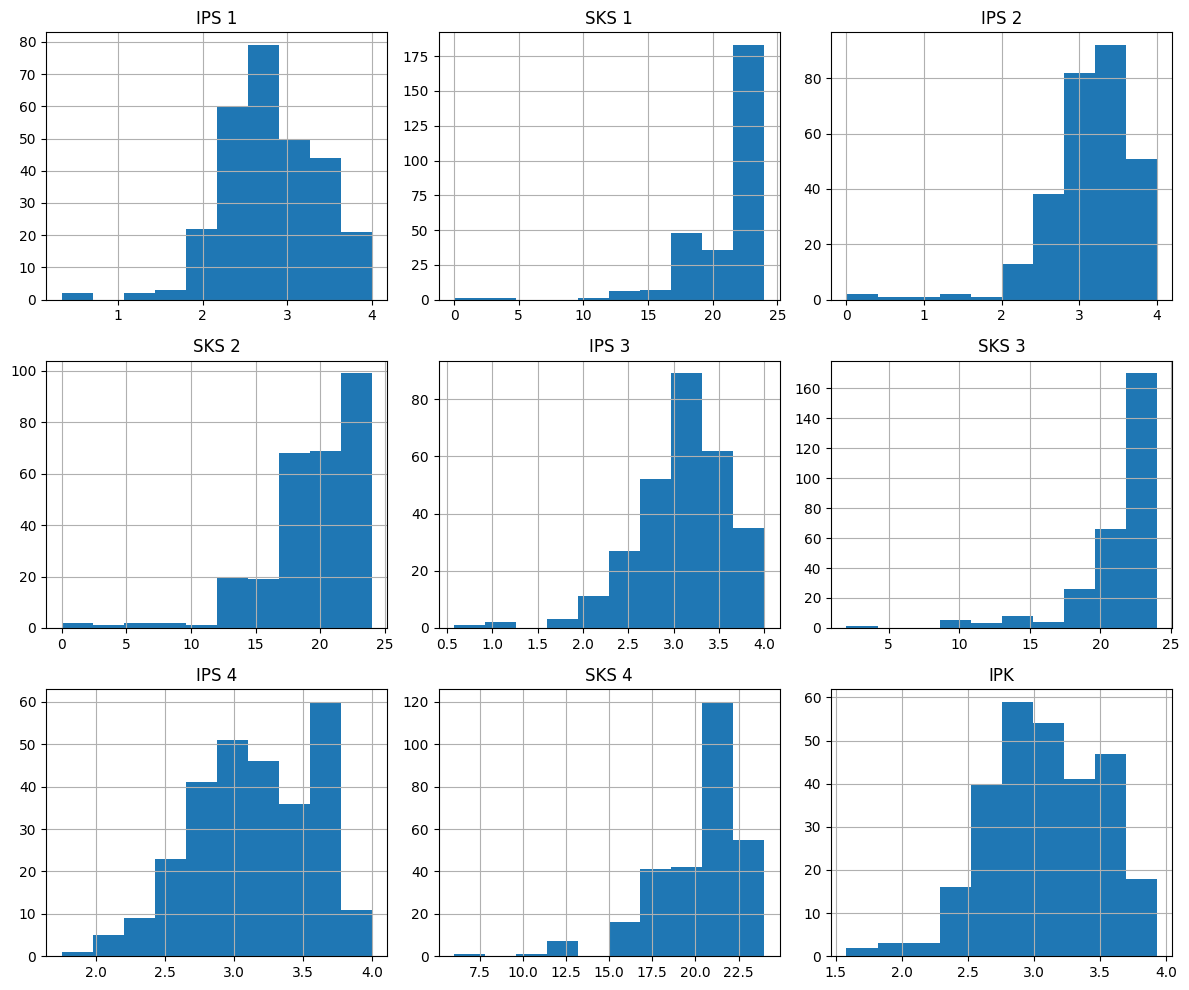

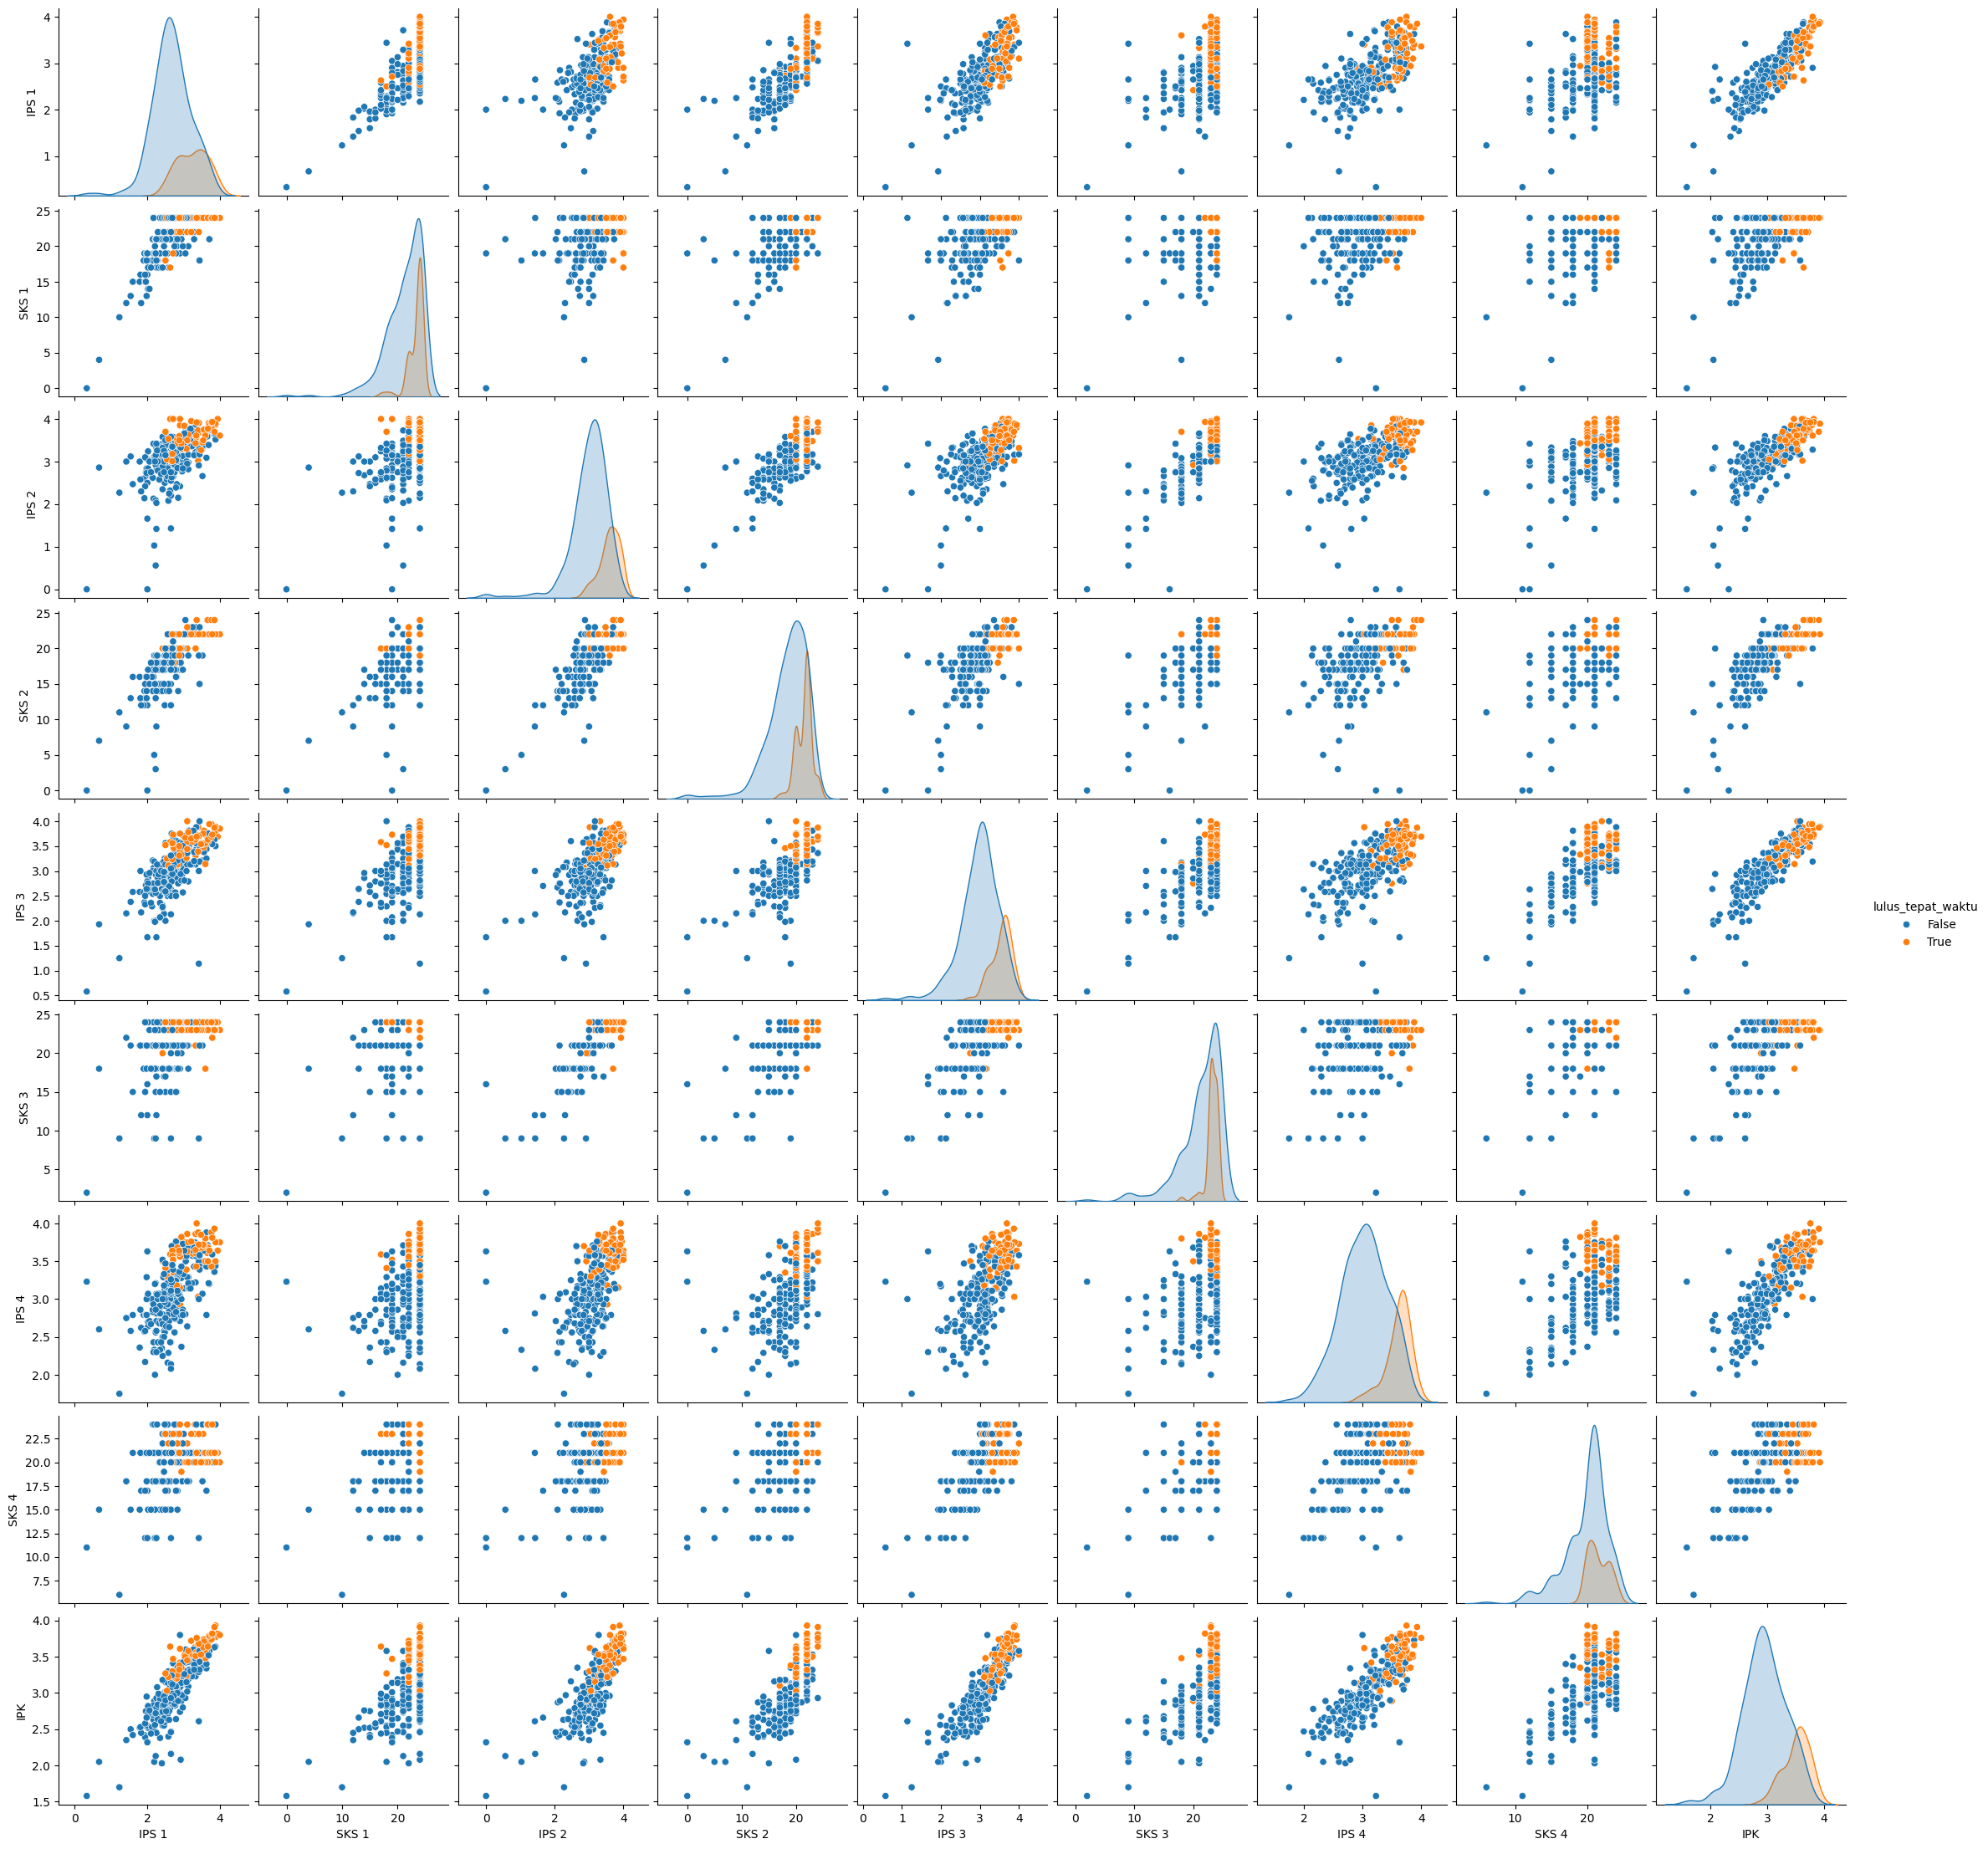

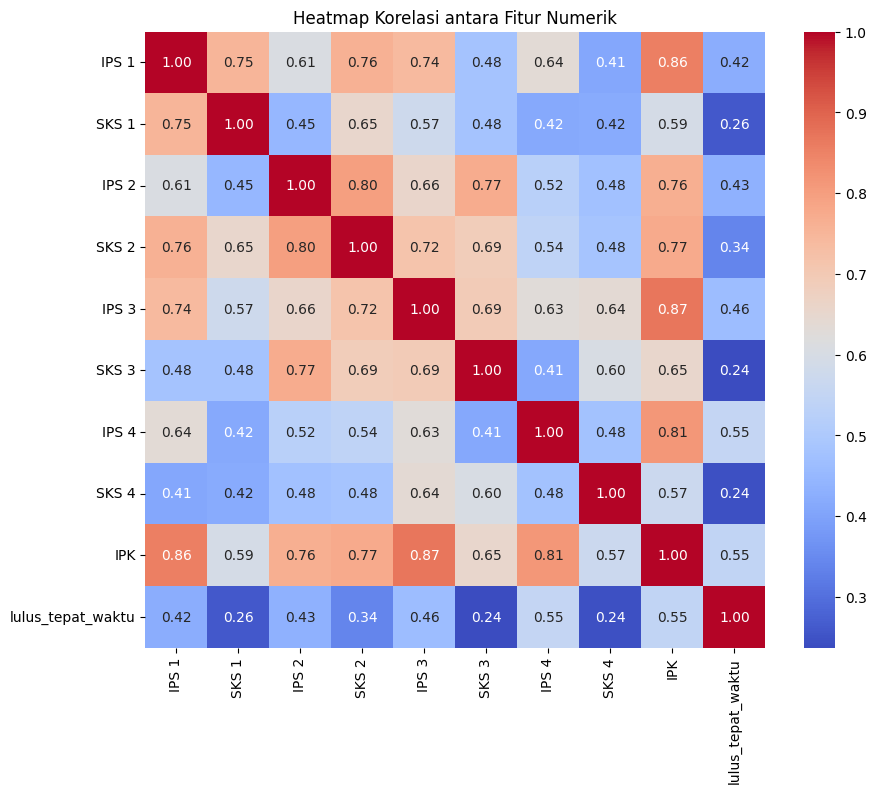

In [15]:

# Memilih subset data dengan fitur numerik
numeric_features = ['IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']
data_subset = df[numeric_features + ['lulus_tepat_waktu']]

# Visualisasi histogram untuk setiap fitur numerik
data_subset.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Visualisasi scatter plot untuk hubungan antara fitur numerik dan target
sns.pairplot(data_subset, hue='lulus_tepat_waktu', diag_kind='kde')
plt.show()

# Visualisasi heatmap untuk korelasi antara fitur numerik
correlation_matrix = data_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Fitur Numerik')
plt.show()

In [13]:
# Membuat DataFrame dari dictionary
df = pd.DataFrame(data)

# Menghitung durasi studi
df['durasi_studi'] = df['tahun_lulus'] - df['tahun_masuk']

# Menambahkan kolom target
df['lulus_tepat_waktu'] = df['durasi_studi'] <= 4

# Persiapan data (pilih fitur dan target)
fitur = ['IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']
X = df[fitur]
y = df['lulus_tepat_waktu']

# Bagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang dalam data training dan testing
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Latih model dengan data yang sudah diisi nilai yang hilang
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

# Evaluasi model
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model setelah menangani nilai yang hilang:", accuracy)

# Membuat laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['Tepat Waktu', 'Tidak Tepat Waktu'])
print(report)

Akurasi model setelah menangani nilai yang hilang: 0.8596491228070176
                   precision    recall  f1-score   support

      Tepat Waktu       0.90      0.90      0.90        42
Tidak Tepat Waktu       0.73      0.73      0.73        15

         accuracy                           0.86        57
        macro avg       0.82      0.82      0.82        57
     weighted avg       0.86      0.86      0.86        57



In [24]:
# Membuat DataFrame dari dictionary
df = pd.DataFrame(data)

# Menghitung durasi studi
df['durasi_studi'] = df['tahun_lulus'] - df['tahun_masuk']

# Menambahkan kolom target
df['lulus_tepat_waktu'] = df['durasi_studi'] <= 4

# Persiapan data (pilih fitur dan target)
fitur_durasi = ['IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4','IPK']
X_durasi = df[fitur_durasi]
y_durasi = df['durasi_studi']

# Bagi data menjadi data pelatihan dan data uji
X_train_durasi, X_test_durasi, y_train_durasi, y_test_durasi = train_test_split(X_durasi, y_durasi, test_size=0.2, random_state=42)

# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang dalam data pelatihan dan testing
X_train_durasi_imputed = imputer.fit_transform(X_train_durasi)
X_test_durasi_imputed = imputer.transform(X_test_durasi)

# Membuat model regresi linier
regression_model = LinearRegression()

# Melatih model regresi
regression_model.fit(X_train_durasi_imputed, y_train_durasi)

# Melakukan prediksi menggunakan data uji
prediksi_durasi = regression_model.predict(X_test_durasi_imputed)

# Menampilkan hasil prediksi
print("Prediksi durasi studi:", prediksi_durasi)

Prediksi durasi studi: [5.14318356 6.79476899 7.11670104 6.63495348 5.73220918 4.73027429
 4.76698622 5.39307983 5.9958325  6.92203551 6.3921045  4.19027714
 4.86249813 4.88282195 7.67043825 4.44327283 5.03686237 5.12569412
 7.76836499 7.42818187 5.48919138 5.64772391 6.52448241 4.4614832
 5.93386511 4.4405016  6.43604504 7.15423028 4.39886659 5.22067753
 4.50414278 4.50875119 5.26615333 4.73353464 6.21467845 5.40727577
 6.26896157 5.85984786 4.95428327 4.7577369  5.6069982  6.18314553
 6.01367386 4.4969517  6.22004548 5.97582174 4.79921648 5.57223164
 7.32772518 6.03038447 4.55935945 6.79451459 5.74563105 7.32191974
 5.55425774 4.79030812 5.54249391]


In [25]:
# Contoh data baru yang ingin diprediksi
data_baru = {
    'IPS 1': [3.2],
    'SKS 1': [20],
    'IPS 2': [3.5],
    'SKS 2': [18],
    'IPS 3': [3.0],
    'SKS 3': [21],
    'IPS 4': [3.2],
    'SKS 4': [22],
    'IPK': [3.25]
}

# Membuat DataFrame dari data baru
df_baru = pd.DataFrame(data_baru)

# Mengisi nilai yang hilang dalam data baru
X_baru_imputed = imputer.transform(df_baru)

# Melakukan prediksi menggunakan model yang telah dilatih
prediksi_durasi_baru = regression_model.predict(X_baru_imputed)

# Menampilkan hasil prediksi
print("Prediksi durasi studi untuk data baru:", prediksi_durasi_baru)

Prediksi durasi studi untuk data baru: [5.39004125]


In [26]:
# Mendapatkan nama fitur yang digunakan dalam model regresi
fitur_model = fitur_durasi  # Anda dapat mengganti ini dengan nama fitur yang digunakan dalam model Anda

# Menampilkan nama fitur
print("Fitur yang digunakan dalam model regresi linier:")
for i, fitur in enumerate(fitur_model):
    print(f"{i+1}. {fitur}")

Fitur yang digunakan dalam model regresi linier:
1. IPS 1
2. SKS 1
3. IPS 2
4. SKS 2
5. IPS 3
6. SKS 3
7. IPS 4
8. SKS 4
9. IPK


Dibawah Ini Backpropagation

In [29]:
# Membuat DataFrame dari dictionary
df = pd.DataFrame(data)

# Menghitung durasi studi
df['durasi_studi'] = df['tahun_lulus'] - df['tahun_masuk']

# Menambahkan kolom target
df['lulus_tepat_waktu'] = df['durasi_studi'] <= 4

# Persiapan data (pilih fitur dan target)
fitur_durasi = ['IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']
X_durasi = df[fitur_durasi]
y_durasi = df['durasi_studi']

# Bagi data menjadi data pelatihan dan data uji
X_train_durasi, X_test_durasi, y_train_durasi, y_test_durasi = train_test_split(X_durasi, y_durasi, test_size=0.2, random_state=42)

# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang dalam data pelatihan dan testing
X_train_durasi_imputed = imputer.fit_transform(X_train_durasi)
X_test_durasi_imputed = imputer.transform(X_test_durasi)

# Membangun model neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(len(fitur_durasi),)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer tanpa aktivasi karena kita melakukan regresi
])

# Mengompilasi model dengan optimizer dan loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model dengan data pelatihan
model.fit(X_train_durasi_imputed, y_train_durasi, epochs=50, batch_size=32, validation_split=0.2)

# Evaluasi model dengan data uji
loss = model.evaluate(X_test_durasi_imputed, y_test_durasi)
print("Loss:", loss)

# Melakukan prediksi menggunakan data uji
prediksi_durasi_backpropagation = model.predict(X_test_durasi_imputed)
print("Prediksi durasi studi menggunakan backpropagation:", prediksi_durasi_backpropagation)

Epoch 1/50
6/6 [==============================] - 1s 39ms/step - loss: 4.1168 - val_loss: 3.8389
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 3.2663 - val_loss: 3.2076
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 2.9786 - val_loss: 3.3911
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 2.7750 - val_loss: 2.9816
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 2.6047 - val_loss: 3.0100
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 2.4871 - val_loss: 2.7521
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 2.3339 - val_loss: 2.7806
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 2.2961 - val_loss: 2.5392
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 2.2005 - val_loss: 2.6079
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 2.0822 - val_loss: 2.4580
Epoch 11/50
6/6 [===================

In [30]:
# Contoh data baru yang ingin diprediksi
data_baru = {
    'IPS 1': [3.2],
    'SKS 1': [20],
    'IPS 2': [3.5],
    'SKS 2': [18],
    'IPS 3': [3.0],
    'SKS 3': [21],
    'IPS 4': [3.2],
    'SKS 4': [22],
    'IPK': [3.25]
}

# Membuat DataFrame dari data baru
df_baru = pd.DataFrame(data_baru)

# Mengisi nilai yang hilang dalam data baru
X_baru_imputed = imputer.transform(df_baru)

# Melakukan prediksi menggunakan model yang telah dilatih
prediksi_durasi_baru = model.predict(X_baru_imputed)

# Menampilkan hasil prediksi
print("Prediksi durasi studi untuk data baru:", prediksi_durasi_baru)

1/1 [==============================] - 0s 54ms/step
Prediksi durasi studi untuk data baru: [[4.8841476]]


In [42]:
# Simpan model menggunakan TensorFlow
model.save('model_neural_network')

# Tambahkan kode berikut untuk menyimpan objek imputer
with open('imputer.pkl', 'wb') as file:
    pickle.dump(imputer, file)

# Memuat kembali model
model_loaded = load_model('model_neural_network')

# Memeriksa arsitektur model
print("Arsitektur model neural network:")
print(model_loaded.summary())

Arsitektur model neural network:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


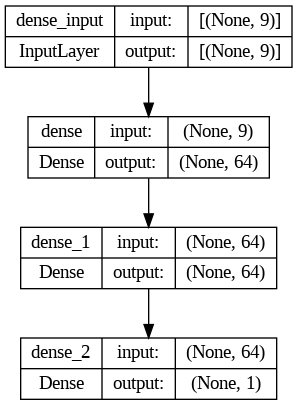

In [41]:
# Plot arsitektur model
plot_model(model_loaded, to_file='model_neural_network.png', show_shapes=True, show_layer_names=True)